<a href="https://colab.research.google.com/github/ashishde1991/CRYPTO-WORLD-/blob/master/MMM_Case_study_Hill_adstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# First would be to install lightweight_mmm
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git
!pip uninstall -y matplotlib
!pip install matplotlib==3.1.3

  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-8n2ukyjl
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-8n2ukyjl
  Resolved https://github.com/google/lightweight_mmm.git to commit 8152c43c8b52eb8c020c1c54c7e4bfa5140e42d0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 31.7 MB/s eta 0:00:00
  Created wheel for lightweight-mmm: filename=lightweight_mmm-0.1.9-py3-none-any.whl size=105293 sha256=ea636f73c76bdf3f8c79077178373a34eb45f27f71242231b6a18ff0b79cbc99
  Stored in directory: /tmp/pip-ephem-wheel-cache-f2uoot4s/wheels/24/39/b1/2a08aa08bb7f10163332e54a87e860efd8f74fe42f4b93f9e2
Successfully built lightweight-mmm
  Attempting uninstall: matplotlib
    Found existing inst

Found existing installation: matplotlib 3.6.1
Uninstalling matplotlib-3.6.1:
  Successfully uninstalled matplotlib-3.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11756955 sha256=bc83e9fec234e8a62638dbea508bae9643e87bb38357767256f2261901ce7400
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires matplotlib>=3.2, but you 

In [30]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro
import pandas as pd

In [2]:
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [33]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns

In [4]:
uploaded = files.upload()

Saving MMM_Casestudy.xlsx to MMM_Casestudy.xlsx


In [42]:
df = pd.read_excel(io.BytesIO(uploaded.get('MMM_Casestudy.xlsx')))


In [43]:
df

,Date,TikTok,Facebook,Google Ads,Sales
0,2018-01-07,13528.10,0.00,0.00,9779.80
1,2018-01-14,0.00,5349.65,2218.93,13245.19
2,2018-01-21,0.00,4235.86,2046.96,12022.66
3,2018-01-28,0.00,3562.21,0.00,8846.95
4,2018-02-04,0.00,0.00,2187.29,9797.07
...,...,...,...,...,...
195,2021-10-03,0.00,0.00,1691.68,9030.17
196,2021-10-10,11543.58,4615.35,2518.88,15904.11
197,2021-10-17,0.00,4556.16,1919.19,12839.29
198,2021-10-24,0.00,0.00,1707.65,9063.45


In [49]:
df1 = df.drop('Date', axis=1)

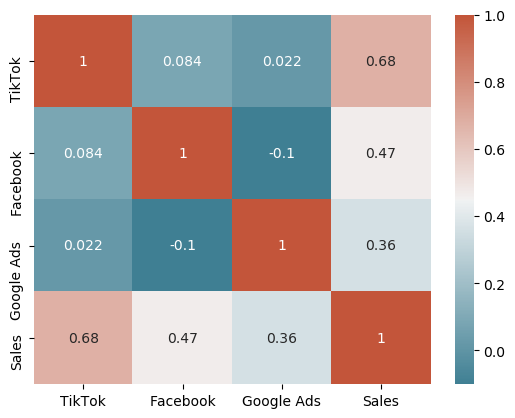

In [51]:
#checking correlation between variables
corr = df1.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

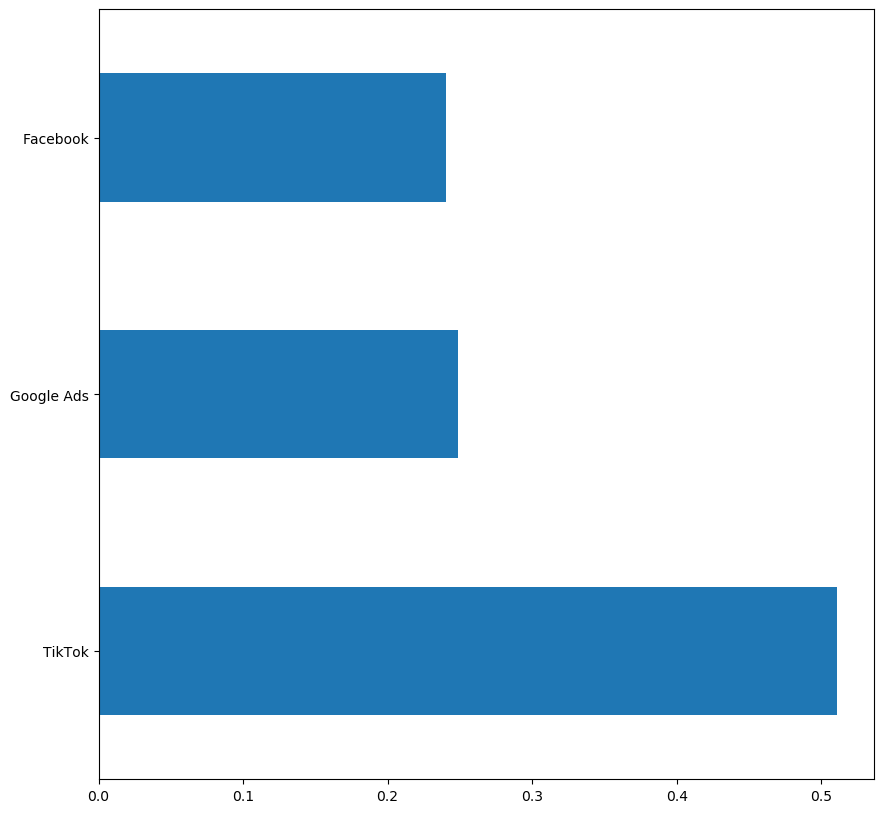

In [55]:
#checking feature importance
# Setting X and y variables
X = df1.loc[:, df1.columns != 'Sales']
y = df1['Sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4)
modelrf = RandomForestRegressor(random_state=1)
modelrf.fit(X_train, y_train)
pred = modelrf.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(modelrf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))


In [8]:
media_data = df[['TikTok','Facebook','Google Ads']].to_numpy()
target = df[['Sales']].to_numpy()
costs = df[['TikTok','Facebook','Google Ads']].sum().to_numpy()

In [9]:
media_data.shape

(200, 3)

In [10]:
data_size = media_data.shape[0]
data_size

200

In [11]:
# Split and scale data.
split_point = data_size - 30
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
target_train = target[:split_point].reshape(-1)

In [56]:
target_train

array([ 9779.8 , 13245.19, 12022.66,  8846.95,  9797.07, 13527.65,
        9635.43, 15355.11, 12199.37, 11368.23,  8640.44,  4960.26,
       12726.46, 11421.71, 10875.31, 13048.08, 10775.86, 15013.62,
       14158.32, 15918.14, 11128.75, 12170.36, 10134.7 , 11093.55,
        8170.63,  6542.71, 11325.8 ,  7793.24, 15010.94, 10634.31,
       11751.39,  9151.2 ,  9141.46,  7399.92, 10893.16, 11550.47,
        8672.09,  9427.22,  8036.91, 11240.58, 12386.83, 12513.84,
       12235.08, 11895.78, 10047.41,  9705.39,  8847.19, 10379.07,
       11312.48,  8226.23, 13966.11, 13460.32, 15742.61, 10440.98,
        8535.49,  7801.58,  9570.01,  7854.78,  8067.55,  7848.26,
       14012.71, 16127.45, 11636.97,  8193.65,  9451.61, 11454.02,
        5526.84,  7677.52,  8084.98,  7456.56,  5365.18,  8134.16,
       10065.53, 10878.94, 11524.63,  6563.85, 14165.57, 15624.56,
       11305.04,  8245.57,  7676.64,  5023.53,  8058.85,  9902.44,
        8058.05,  7498.36, 12216.8 , 11042.8 , 10713.92,  9130

In [12]:
#scaling the values
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
media_data_test = media_scaler.fit_transform(media_data_test)
target_train1 = target_scaler.fit_transform(target_train)
costs2 = cost_scaler.fit_transform(costs)

In [13]:
#choosing hill_adstock for faster processing
mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")

In [14]:
number_warmup=200
number_samples=200


In [57]:

mmm.fit(
    media=media_data_train,
    media_prior=costs2,
    target=target_train1,
    number_warmup=number_warmup,
    number_samples=number_samples,
    number_chains=1,
        )

sample: 100%|██████████| 400/400 [00:32<00:00, 12.32it/s, 511 steps of size 1.01e-02. acc. prob=0.93]


In [58]:
mmm.print_summary()


                                         mean       std    median      5.0%     95.0%     n_eff     r_hat
                      coef_media[0]      1.07      0.16      1.05      0.79      1.29     30.08      1.07
                      coef_media[1]      0.63      0.21      0.58      0.37      0.91     44.12      1.02
                      coef_media[2]      0.52      0.17      0.48      0.25      0.75     38.49      1.00
                      coef_trend[0]      0.00      0.00      0.00     -0.00      0.00    105.13      1.00
                         expo_trend      0.63      0.10      0.60      0.50      0.79     52.14      1.02
             gamma_seasonality[0,0]      0.01      0.00      0.01      0.00      0.02    159.50      1.00
             gamma_seasonality[0,1]      0.01      0.00      0.01     -0.00      0.01    272.78      1.00
             gamma_seasonality[1,0]      0.00      0.00      0.00     -0.00      0.01    250.98      1.00
             gamma_seasonality[1,1]     -0.00

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:957: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: No implementation of function Function(<function histogram at 0x79a0ad19bb50>) found for signature:
 
 >>> histogram(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'np_histogram': File: numba/np/arraymath.py: Line 4071.
    With argument(s): '(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   No implementation of function Function(<function linspace at 0x79a0ad0ffd00>) found for signature:
    
    >>> linspace(readonly buffer(float32, 0d,

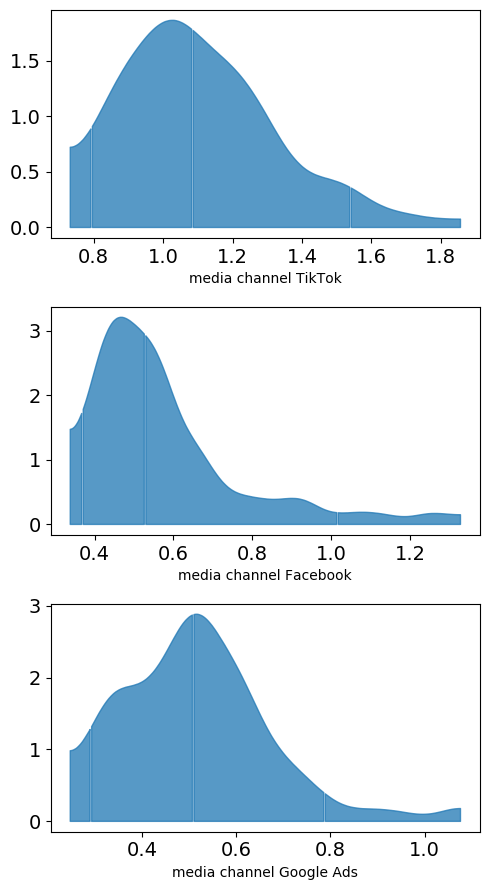

In [17]:
channel_names = ['TikTok','Facebook','Google Ads']
plot.plot_media_channel_posteriors(media_mix_model=mmm,channel_names= channel_names )
#gives the coefficient parameters based on the confidence intervals

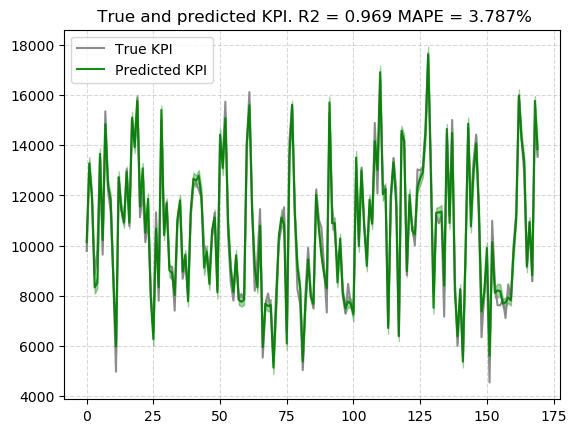

In [18]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [22]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.fit_transform(media_data_test))
new_predictions.shape

(200, 30)

In [23]:
new_predictions

Array([[1.2642382 , 1.3270448 , 0.9289758 , ..., 1.2363428 , 0.84851354,
        0.74199843],
       [1.2687829 , 1.2773287 , 0.9236953 , ..., 1.1979935 , 0.81236947,
        0.71287084],
       [1.2621645 , 1.3014972 , 0.92298913, ..., 1.2264602 , 0.84944046,
        0.74174345],
       ...,
       [1.2669604 , 1.2587082 , 0.91489255, ..., 1.2090213 , 0.8414612 ,
        0.73490787],
       [1.2868164 , 1.3075876 , 0.976514  , ..., 1.2111925 , 0.84901655,
        0.7230929 ],
       [1.2500298 , 1.2787392 , 0.9111254 , ..., 1.219077  , 0.8435163 ,
        0.7324933 ]], dtype=float32)

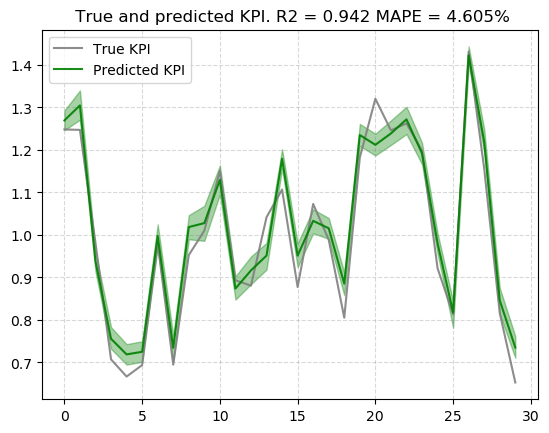

In [24]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.fit_transform(target[split_point:].squeeze()))

### Media insights

In [25]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

In [26]:
from matplotlib import pyplot as plt
import numpy as np

def custom_plot_media_baseline_contribution_area_plot(
        media_mix_model,
        target_scaler=None,
        channel_names = ['TikTok','Facebook','Google Ads'],
        fig_size = (20, 7)):
      """Plots an area chart to visualize weekly media & baseline contribution.

      Args:
        media_mix_model: Media mix model.
        target_scaler: Scaler used for scaling the target.
        channel_names: Names of media channels.
        fig_size: Size of the figure to plot as used by matplotlib.

      Returns:
        Stacked area chart of weekly baseline & media contribution.
      """
      # Create media channels & baseline contribution dataframe.
      contribution_df = plot.create_media_baseline_contribution_df(
          media_mix_model=media_mix_model,
          target_scaler=target_scaler,
          channel_names = ['TikTok','Facebook','Google Ads'])
      contribution_df = contribution_df.clip(0)

      # Create contribution dataframe for the plot.
      contribution_columns = [
          col for col in contribution_df.columns if "contribution" in col
      ]
      contribution_df_for_plot = contribution_df.loc[:, contribution_columns]
      contribution_df_for_plot = contribution_df_for_plot[
          contribution_df_for_plot.columns[::-1]]
      period = np.arange(1, contribution_df_for_plot.shape[0] + 1)
      contribution_df_for_plot.loc[:, "period"] = period

      # Plot the stacked area chart.
      fig, ax = plt.subplots()
      contribution_df_for_plot.plot.area(
          x="period", stacked=True, figsize=fig_size, ax=ax)
      ax.set_title("Attribution Over Time", fontsize="x-large")
      ax.tick_params(axis="y")
      ax.set_ylabel("Baseline & Media Chanels Attribution")
      ax.set_xlabel("Period")
      ax.set_xlim(1, contribution_df_for_plot["period"].max())
      ax.set_xticks(contribution_df_for_plot["period"])
      ax.set_xticklabels(contribution_df_for_plot["period"])
      for tick in ax.get_xticklabels():
        tick.set_rotation(45)
      plt.close()
      return fig


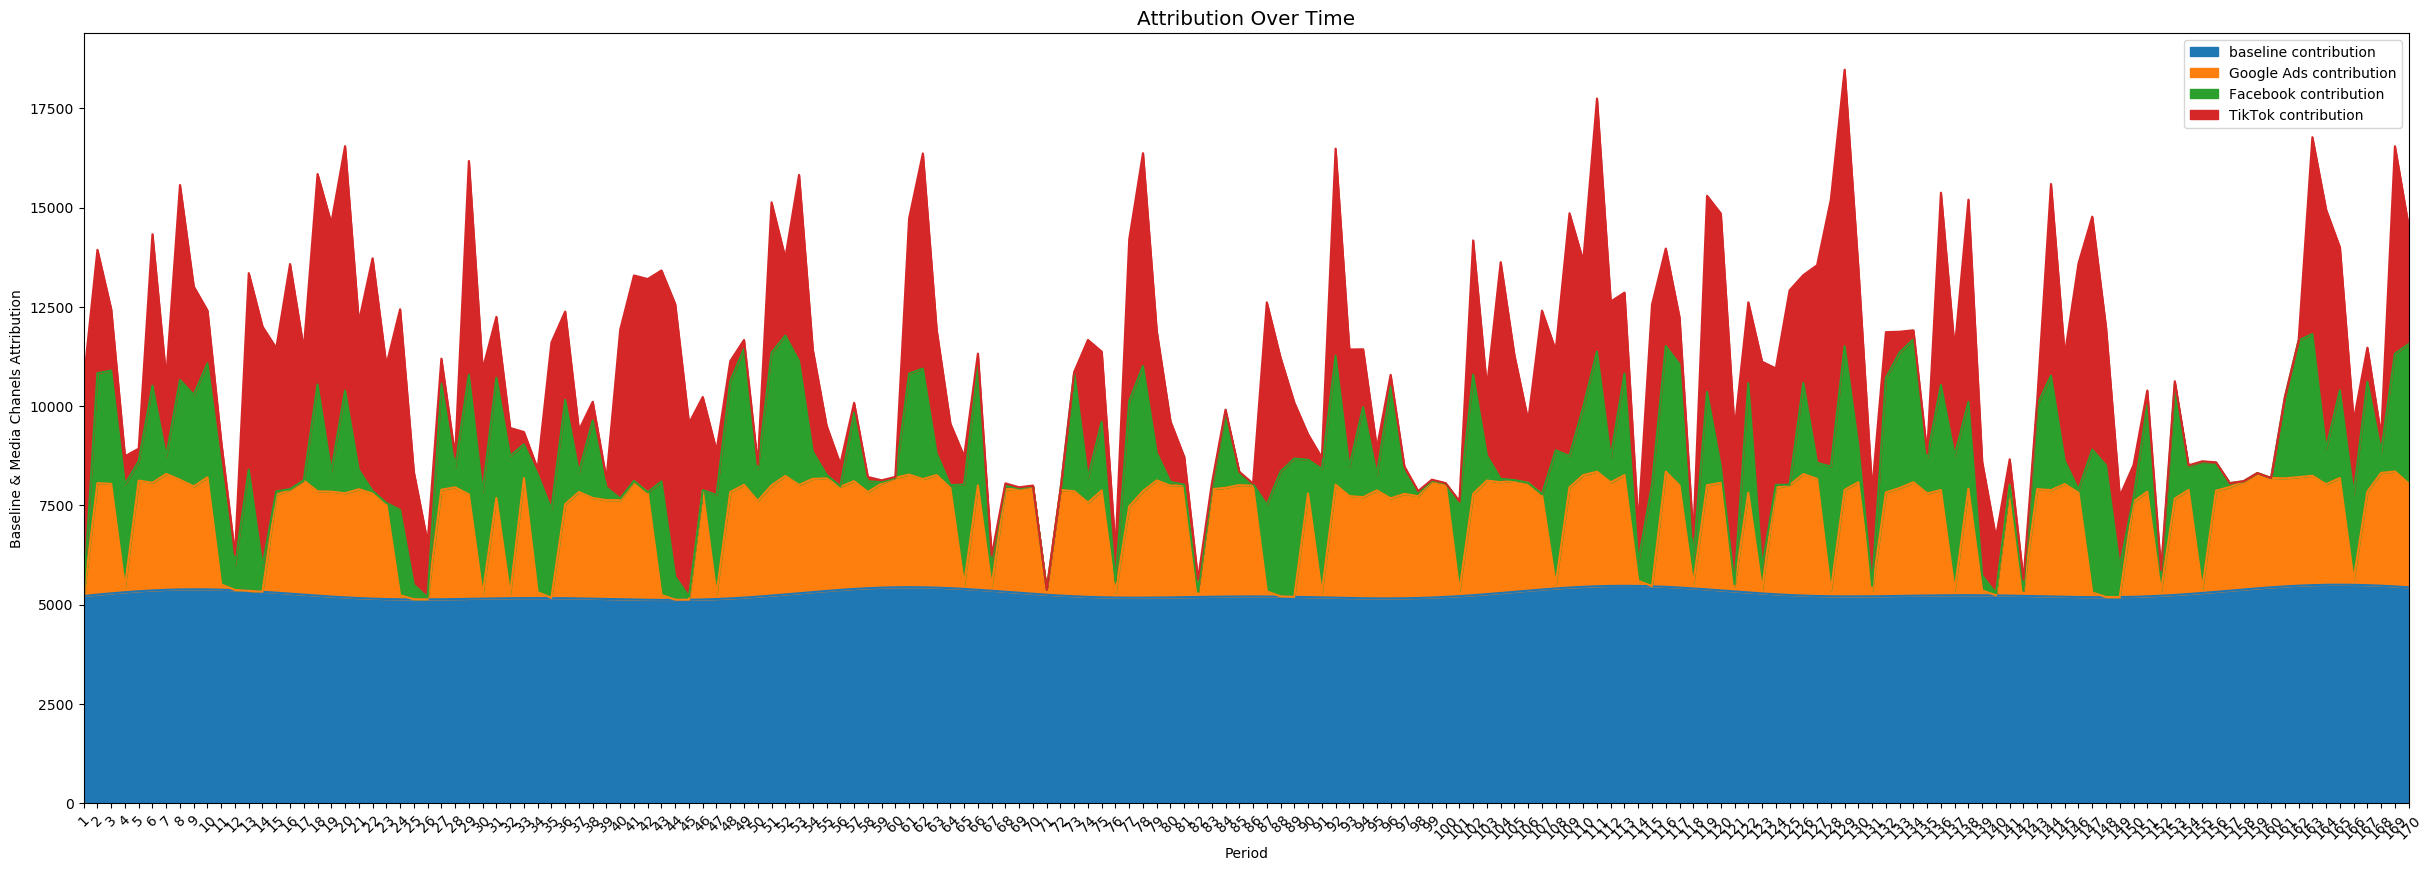

In [27]:
custom_plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

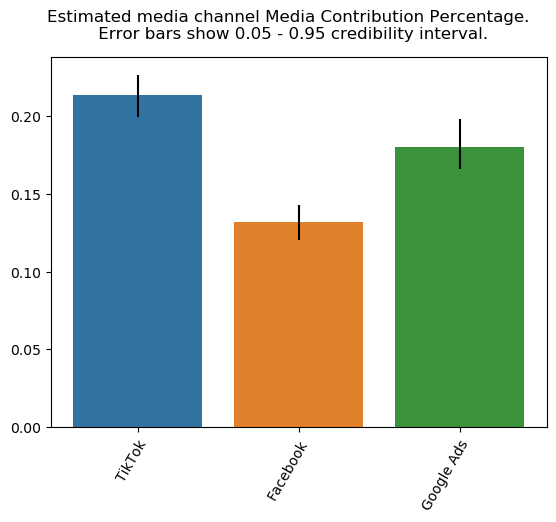

In [28]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage",channel_names = ['TikTok','Facebook','Google Ads'])

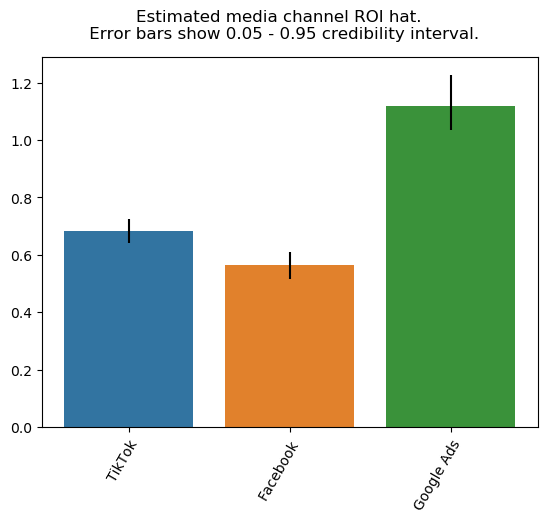

In [29]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat",channel_names = ['TikTok','Facebook','Google Ads'])

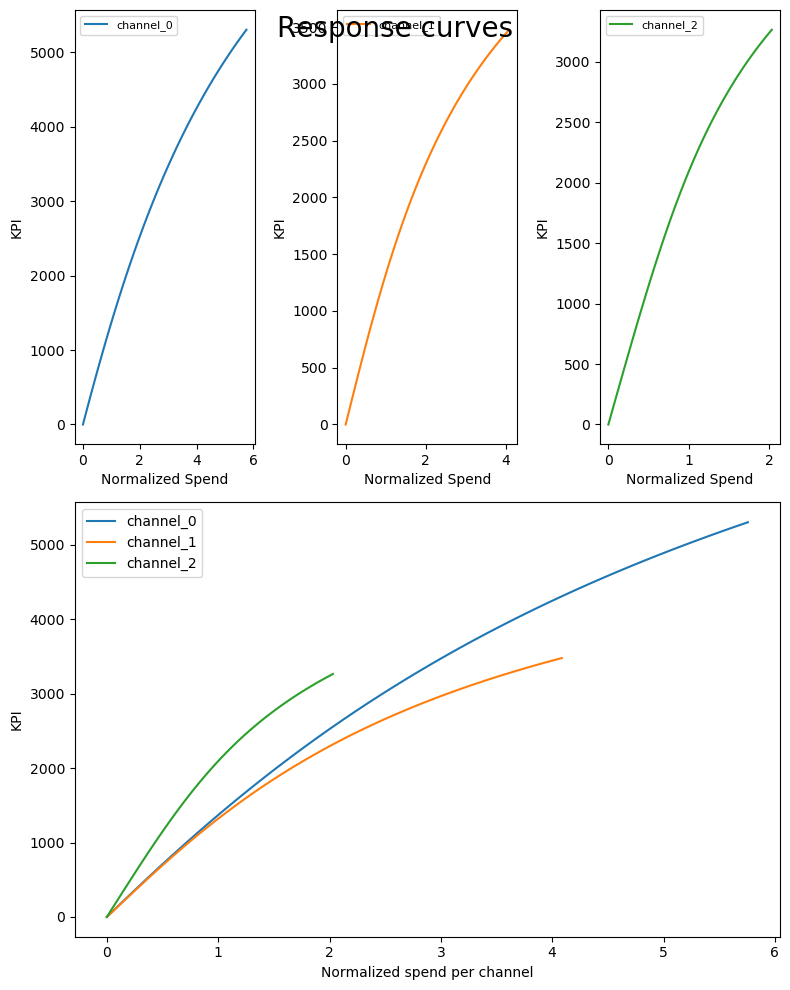

In [32]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler,)